# Flight Price Prediction 

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [3]:
#Reading the dataset
df = pd.read_excel("Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


The dataset has 10683 rows and 11 columns

## Understanding the Dataset and EDA 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can observe that all the learning columns i.e - Airline, Date_of_Journey, Source etc. are all of object datatype, while the Price column i.e - the prediction column is of int datatype.

### Checking for null values

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As observed from the above table, we do see that 2 rows in the dataset, one in Route and one in Total_Stops columns have null values. 

However, it is important to note that not a large number of missing values are present in the columns. Hence, let us now proceed with dropping the rows that have null values.

In [7]:
df.dropna(inplace=True)

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


As expected, the dataset now reduces to 10682 rows and 11 columns.

Let us make new columns from the Date_of_Journey and Arrival_Time.

In [13]:
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [14]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


Now that we have created the necessary columns, let us now drop Date_of_Journey and Dep_Time columns

In [15]:
df.drop("Date_of_Journey", axis = 1, inplace = True)
df.drop("Dep_Time", axis = 1, inplace = True)

df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


Let us do the same thing for Arrival Time column as well

In [16]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

df.drop(["Arrival_Time"], axis = 1, inplace = True)

df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [17]:
#Dropping the Duration Column since we already have the necessary timings about travel 
df.drop(["Duration"], axis = 1, inplace = True)

df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10


## Visualizing the Dataset 

Let us visualize the dataset and understand what the dataset is conveying figuratively

Understanding the relation between Airline and Price

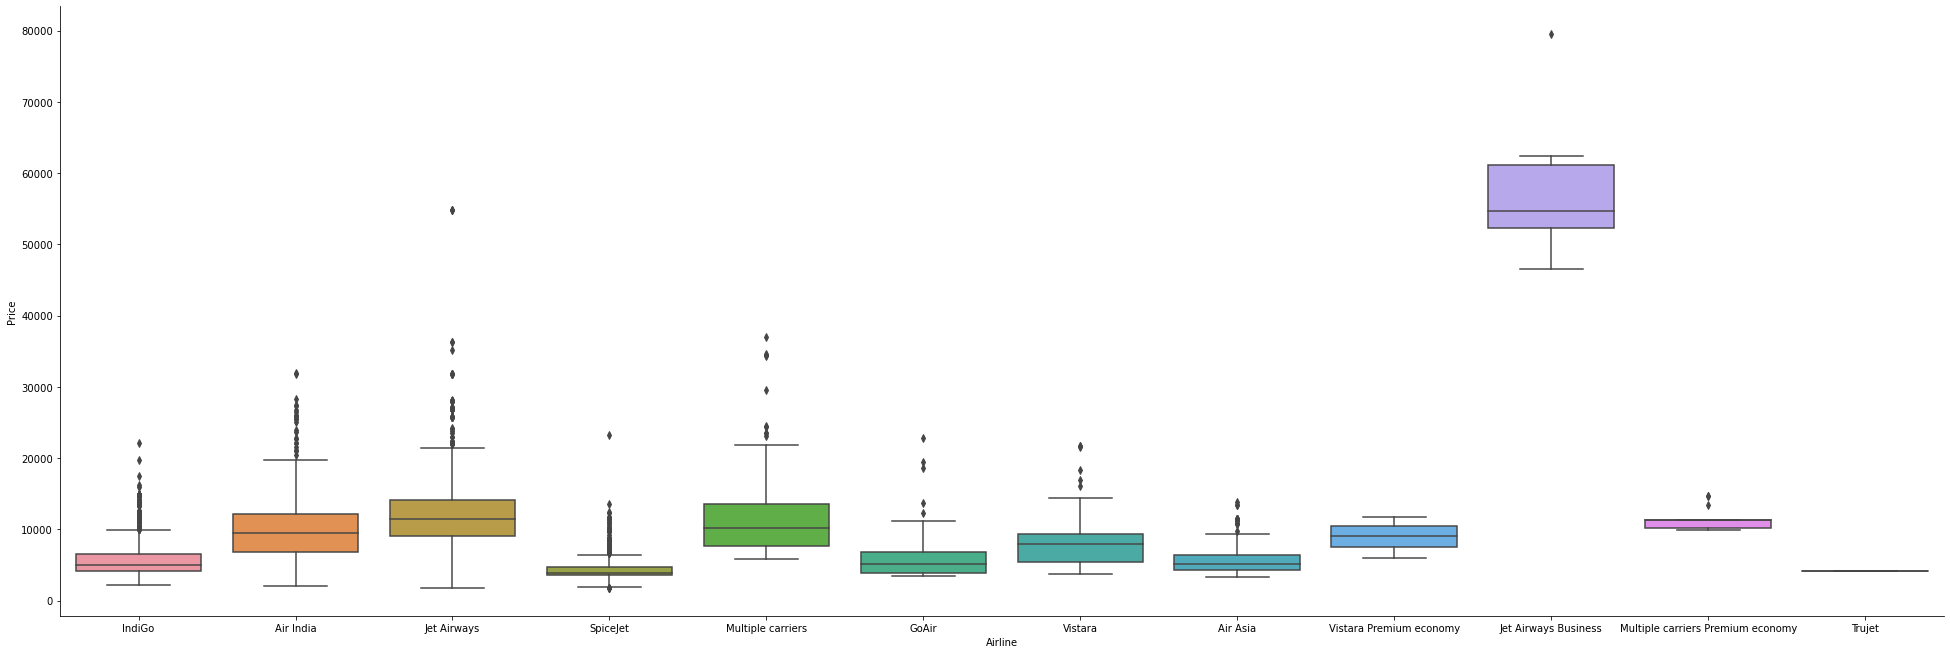

In [31]:
sb.catplot(x='Airline', y='Price', data=df, kind='box', height = 9, aspect = 3)

From the above figure, we see that the price in Jet Airways Business is comparatively higher than other airlines, while Spicejet customers seem to pay the least compared to other airline customers

Understanding the relation between Source and Price

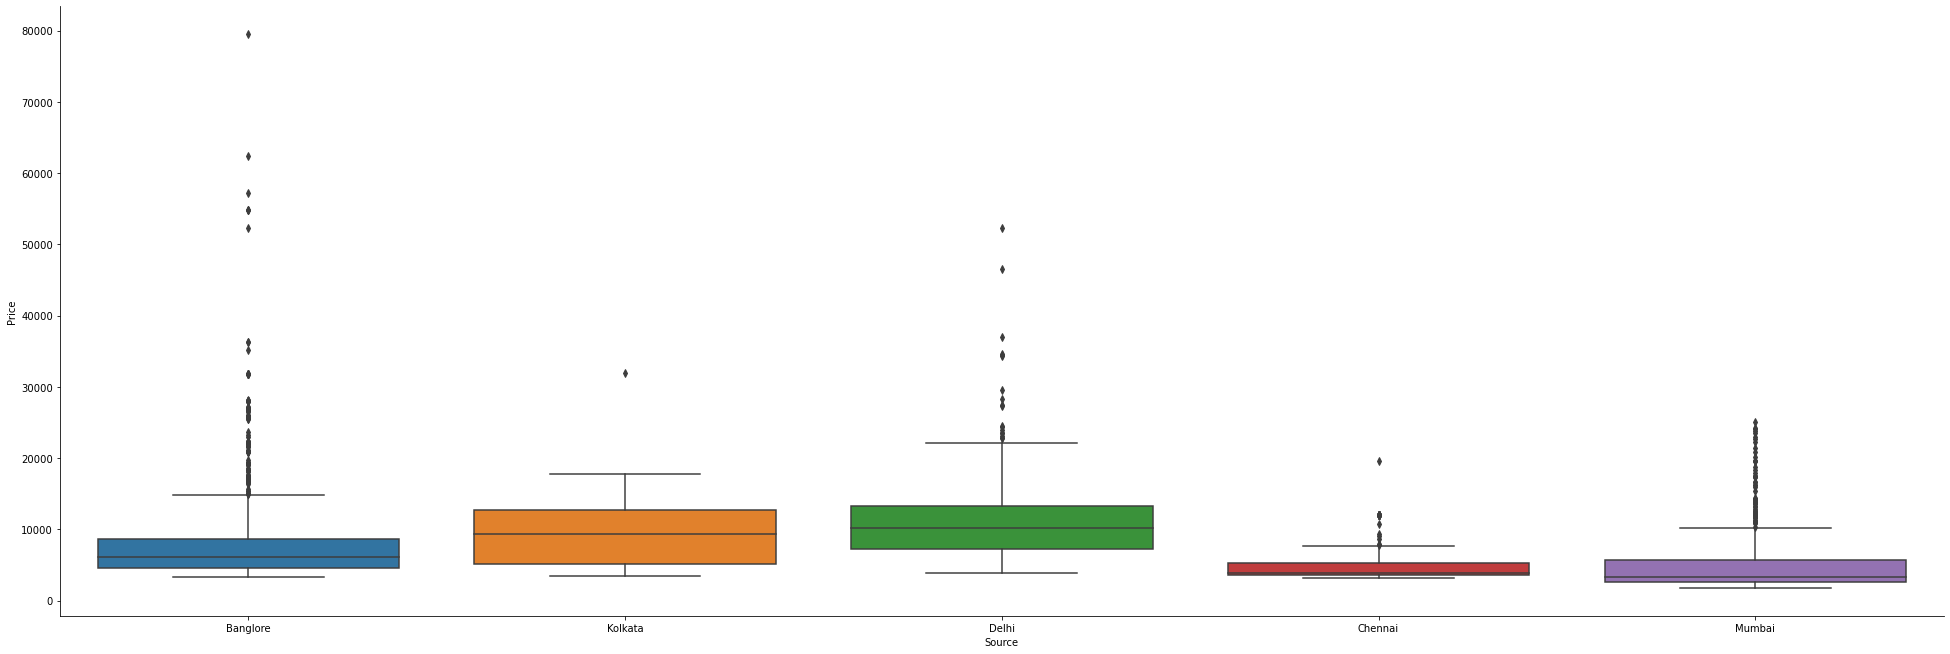

In [32]:
sb.catplot(x='Source', y='Price', data=df, kind='box', height = 9, aspect = 3)

The above figure conveys the message that customers in Delhi tend to pay comparatively more to customers boarding flights from other metropolitan cities, with Mumbai being most likely the cheapest place to book airline tickets

Since Route and Stops columns contain virtually the same information, we are going to drop the Route column

In [33]:
df.drop(["Route"], axis = 1, inplace = True)

df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,11,30,14,10


In [34]:
#Rearranging the dataset so that the price column comes at the end
df = df[["Airline", "Source", "Destination", "Total_Stops", "Additional_Info", "Journey_day", "Journey_month", "Dep_hour", "Dep_min", "Arrival_hour", "Arrival_min", "Price"]]

In [35]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,IndiGo,Banglore,New Delhi,non-stop,No info,24,3,22,20,1,10,3897
1,Air India,Kolkata,Banglore,2 stops,No info,1,5,5,50,13,15,7662
2,Jet Airways,Delhi,Cochin,2 stops,No info,9,6,9,25,4,25,13882
3,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,18,5,23,30,6218
4,IndiGo,Banglore,New Delhi,1 stop,No info,1,3,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,9,4,19,55,22,25,4107
10679,Air India,Kolkata,Banglore,non-stop,No info,27,4,20,45,23,20,4145
10680,Jet Airways,Banglore,Delhi,non-stop,No info,27,4,8,20,11,20,7229
10681,Vistara,Banglore,New Delhi,non-stop,No info,1,3,11,30,14,10,12648


## Handling Categorical Data 

As we see in the dataset, majority of the columns in the dataset contain object datatype. 

Hence, let us now proceed with Label Encoding for better Predictive Model. 

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()
df["Airline"] = le.fit_transform(df["Airline"])
df["Source"] = le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])
df["Additional_Info"] = le.fit_transform(df["Additional_Info"])

In [38]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,3,0,5,non-stop,8,24,3,22,20,1,10,3897
1,1,3,0,2 stops,8,1,5,5,50,13,15,7662
2,4,2,1,2 stops,8,9,6,9,25,4,25,13882
3,3,3,0,1 stop,8,12,5,18,5,23,30,6218
4,3,0,5,1 stop,8,1,3,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,non-stop,8,9,4,19,55,22,25,4107
10679,1,3,0,non-stop,8,27,4,20,45,23,20,4145
10680,4,0,2,non-stop,8,27,4,8,20,11,20,7229
10681,10,0,5,non-stop,8,1,3,11,30,14,10,12648


In [39]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,3,0,5,0,8,24,3,22,20,1,10,3897
1,1,3,0,2,8,1,5,5,50,13,15,7662
2,4,2,1,2,8,9,6,9,25,4,25,13882
3,3,3,0,1,8,12,5,18,5,23,30,6218
4,3,0,5,1,8,1,3,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,9,4,19,55,22,25,4107
10679,1,3,0,0,8,27,4,20,45,23,20,4145
10680,4,0,2,0,8,27,4,8,20,11,20,7229
10681,10,0,5,0,8,1,3,11,30,14,10,12648


## Building a Predictive Model 

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [41]:
from sklearn.model_selection import train_test_split

In [44]:
X=df.drop("Price", axis = 1)
Y=df["Price"]

In [45]:
print(X)

       Airline  Source  Destination  Total_Stops  Additional_Info  \
0            3       0            5            0                8   
1            1       3            0            2                8   
2            4       2            1            2                8   
3            3       3            0            1                8   
4            3       0            5            1                8   
...        ...     ...          ...          ...              ...   
10678        0       3            0            0                8   
10679        1       3            0            0                8   
10680        4       0            2            0                8   
10681       10       0            5            0                8   
10682        1       2            1            2                8   

       Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0               24              3        22       20             1   
1                1             

In [46]:
print(Y)

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64


## Ridge Regression

In [50]:
rd = Ridge()
alphavalues = {'alpha' : [1,0.1,0.01,0.001,0.0001,0]}
grid = GridSearchCV(estimator = rd, param_grid = alphavalues, cv = 5)

grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.4261700082784107
1
{'alpha': 1}


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=3)

In [52]:
rd = Ridge(alpha = 1)
rd.fit(X_train, Y_train)
predrd = rd.predict(X_test)

In [53]:
rd.score(X_train,Y_train)

0.4105127229605009

## Lasso Regression 

In [54]:
ls = Lasso(alpha = 1)
ls.fit(X_train, Y_train)
predls = ls.predict(X_test)

In [55]:
ls.score(X_train, Y_train)

0.4105125261115433

## ElasticNet Regression 

In [56]:
el = ElasticNet(alpha = 1)
el.fit(X_train, Y_train)
predel = el.predict(X_test)

In [57]:
el.score(X_train,Y_train)

0.29901647149344435

## Linear Regression 

In [58]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)

In [59]:
lr.score(X_train, Y_train)

0.4105127694345493

As we can see, conventional regression models are not working well with the current dataset. 

This is because the dataset is quite huge consisting of 10682 rows. Hence, let us employ Random Forest Regressor. 

## Random Forest Regressor 

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfc = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)

In [62]:
rfc.score(X_train, Y_train)

0.9834598525170545

As assumed earlier, we see that Random Forest Regressor is the best possible model for predicting the Flight Price in this particular instance

In [64]:
r2_score(Y_test,predrfc)

0.8673265088036473